In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
x_train = np.array ([[4.7], [2.4], [7.5], [7.1], [4.3], [7.816], 
                     [8.9], [5.2], [8.59], [2.1], [8] , 
                     [10], [4.5], [6], [4]],
                    dtype = np.float32)

y_train = np.array ([[2.6], [1.6], [3.09], [2.4], [2.4], [3.357], 
                     [2.6], [1.96], [3.53], [1.76], [3.2] , 
                     [3.5], [1.6], [2.5], [2.2]], 
                    dtype = np.float32)

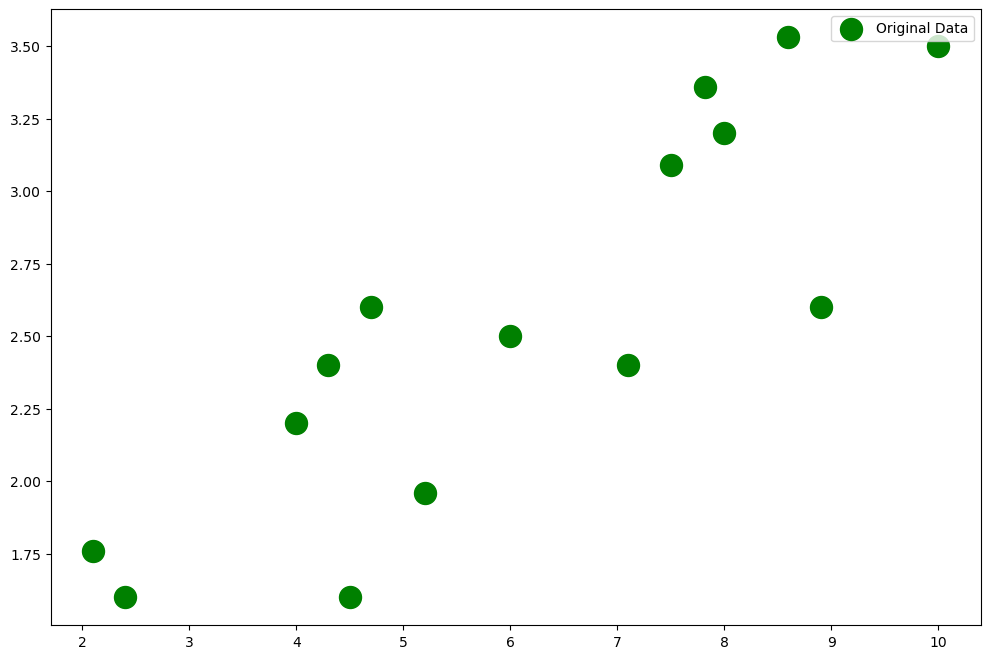

In [12]:
plt.figure(figsize=(12,8))
plt.scatter(x_train, y_train, label='Original Data', s=250, c='g')
plt.legend()
plt.show()

In [13]:
import torch

In [19]:
tx = torch.from_numpy(x_train)
ty = torch.from_numpy(y_train)
print(tx.requires_grad)
print(ty.requires_grad)

False
False


In [20]:
input = 1
hidden = 1
output = 1

In [31]:
t1 = torch.rand(input, hidden, requires_grad=True)
print(t1)
t1.shape

tensor([[0.0233]], requires_grad=True)


torch.Size([1, 1])

In [32]:
t2 = torch.rand(hidden, output, requires_grad=True)
print(t2)
t2.shape

tensor([[0.7490]], requires_grad=True)


torch.Size([1, 1])

In [33]:
learning_rate = 1e-6

100 4.089356899261475
200 4.089356899261475
300 4.089356899261475
400 4.089356899261475
500 4.089356899261475
600 4.089356899261475
700 4.089356899261475
800 4.089356899261475
900 4.089356899261475
1000 4.089356899261475
1100 4.089356899261475
1200 4.089356899261475
1300 4.089356899261475
1400 4.089356899261475
1500 4.089356899261475
1600 4.089356899261475
1700 4.089356899261475
1800 4.089356899261475
1900 4.089356899261475
2000 4.089356899261475
2100 4.089356899261475
2200 4.089356899261475
2300 4.089356899261475
2400 4.089356899261475
2500 4.089356899261475
2600 4.089356899261475
2700 4.089356899261475
2800 4.089356899261475
2900 4.089356899261475
tensor([[0.4533]], requires_grad=True)
tensor([[0.8751]], requires_grad=True)


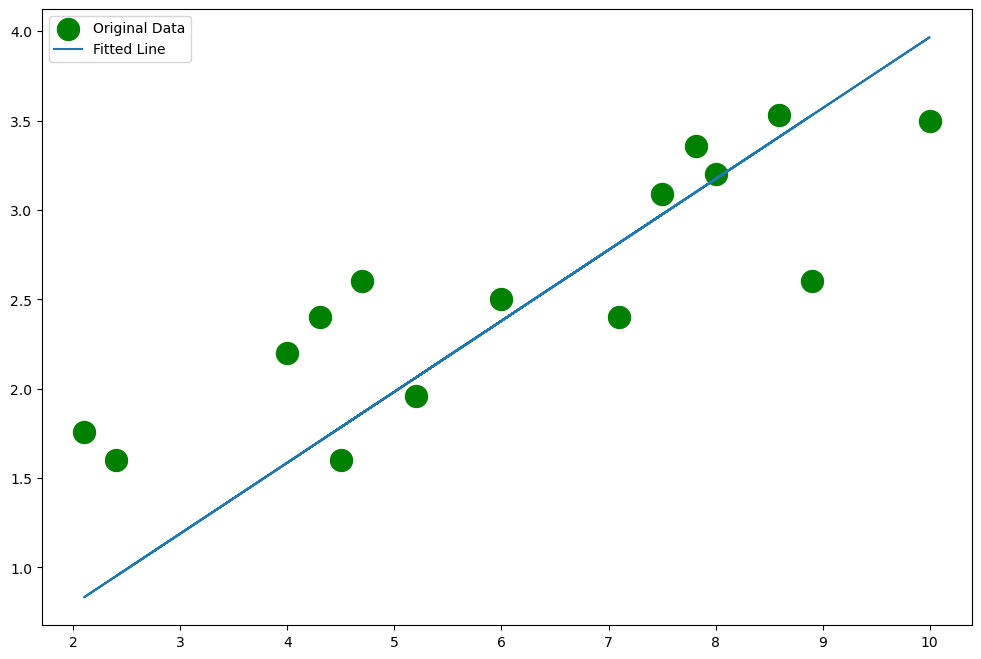

In [58]:
for i in range(1, 3000):
    tp = tx.mm(t1).mm(t2)
    loss = (ty-tp).pow(2).sum()
    loss.backward()

    if i % 100 == 0:
        print(i, loss.item())

    with torch.no_grad():
        t1 -= t1.grad * learning_rate
        t2 -= t2.grad * learning_rate
        t1.grad.zero_()
        t2.grad.zero_()

print(t1)
print(t2)

tx_original = torch.from_numpy(x_train)
ty_predicted = tx_original.mm(t1).mm(t2)
y_predicted = ty_predicted.detach().numpy()

plt.figure(figsize=(12,8))
plt.scatter(x_train, y_train, label='Original Data', s=250, c='g')
plt.plot(x_train, y_predicted, label='Fitted Line')
plt.legend()
plt.show()